#Step 1 : Import the necessary Libraries
### import iris dataset


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.cluster import KMeans


#Step 2 : Load the iris Dataset

In [11]:
iris = load_iris()
X = iris.data
y = iris.target

#Step 3 : Elbow Method
Finding the ideal number of groups to divide the data into is a basic stage in any unsupervised algorithm. One of the most common techniques for figuring out this ideal value of k is the elbow approach.





In [ ]:
inerita = []
k_range = range(1, 11)


for k in k_range:
  kmeans = KMeans(n_clusters= k , init = 'k-means++' , max_iter=300 , n_init=10 , random_state=0)
  kmeans.fit(X)
  inerita.append(kmeans.inertia_)

In [ ]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

#Step 4 : Plot the Elbow graph to find the optimum number of cluster



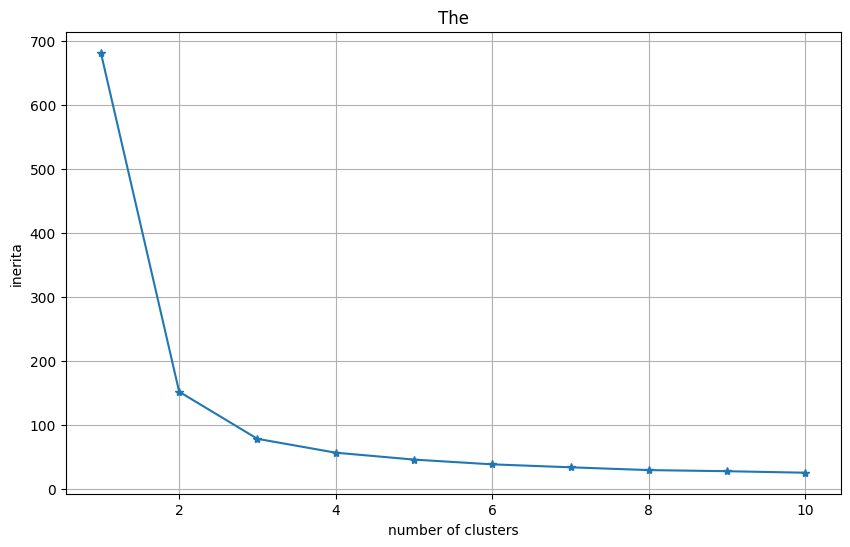

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(k_range, inerita, marker = '*')
plt.title('The')
plt.xlabel('number of clusters')
plt.ylabel('inerita')
plt.grid(True)
plt.show()

The plot displays a scatter plot of data points (X[:,0], X[:,1]) with grid lines. It also marks the initial cluster centers (red stars) generated for K-means clustering.



#Step 5 : Build the Kmeans clustering model



*   Find the cluster center
*   Predict the cluster group





In [50]:
kmeans = KMeans(n_clusters= k , init = 'k-means++' , max_iter=300 , n_init=15, random_state=0)
kmeans.fit(X)
cluster_centers = kmeans.cluster_centers_
print('cluster c' ,cluster_centers)

cluster c [[5.00566038 3.36981132 1.56037736 0.29056604]
 [6.30103093 2.88659794 4.95876289 1.69587629]]


In [51]:
predict = kmeans.predict(X)
print('predict:' , predict)

predict: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [91]:
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }

    clusters[idx] = cluster

clusters

{0: {'center': array([ 0.06919154,  1.78785042,  1.06183904, -0.87041662]),
  'points': []},
 1: {'center': array([-1.11581855,  0.74488834, -1.33144319, -0.43023013]),
  'points': []},
 2: {'center': array([ 0.47220939, -0.35227962, -1.99014048,  1.53612873]),
  'points': []}}

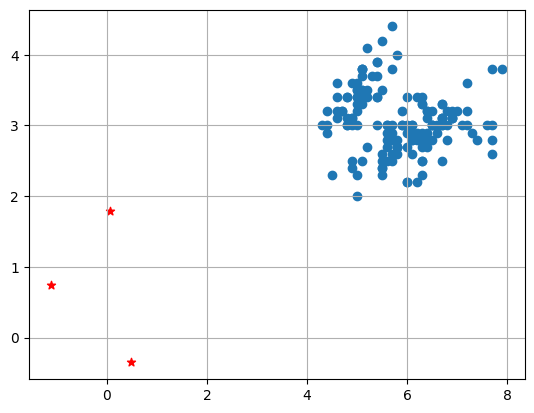

In [92]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

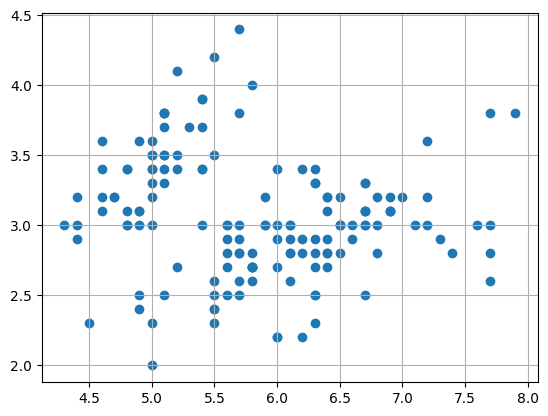

In [83]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [93]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [94]:


def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []

        curr_x = X[idx]

        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []
    return clusters

In [96]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

#Step 6 : Predict the cluster group

In [97]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

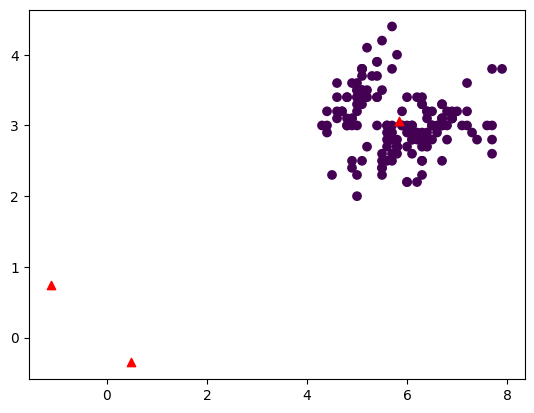

In [98]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

#**Well done :)**
